## Сборный проект ##

Cфера деятельности - интернет-магазин компьютерных игр.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Шаг 1. Изучение общей информации о данных

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as st
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


### Вывод

По предварительной оценке данных можно сделать вывод, что столбцы Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating имеют явные пропуски. Говоря о типах данных, необходимо сказать, что в столбцах Year_of_Release и Critic_Score нужно поменять тип данных на целочисленный. User_Score имеет тип данных - object, однако столбец имеет численные значения - необходимо исправить тип данных.

### Шаг 2. Подготовка данных

Замените названия столбцов (приведите к нижнему регистру)

In [7]:
data.columns = map(str.lower, data.columns)
# Проверим
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуйте данные в нужные типы и обработайте пропуски при необходимости.

In [8]:
# Уберем пропуски из столбца year_of_release, заменив их на нули
data['year_of_release'] = data['year_of_release'].fillna(0)
# Поменяем тип данных
data['year_of_release'] = data['year_of_release'].astype('int')
# Проверим изменения
# data.info()

In [9]:
# Уберем пропуски из столбца Critic_Score, заменив их на отрицательные значения 
data['critic_score'] = data['critic_score'].fillna(-100)
# Поменяем тип данных
data['critic_score'] = data['critic_score'].astype('int')
# Проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


In [10]:
# Переведем из object в float
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
# Уберем пропуски из столбца Critic_Score, заменив их на отрицательные значения 
data['user_score'] = data['user_score'].fillna(-100)
# Поменяем тип данных
data['user_score'] = data['user_score'].astype('int')
# Проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null int64
rating             9949 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.4+ MB


In [11]:
# приведем к нижнему регистру все object строки
def lower_object_string(df):
    if df.dtype=='object':
        df = df.str.lower()
    return df
data = data.apply(lambda x: lower_object_string(x))

In [12]:
# Заменим NaN в rating
data['rating'] = data['rating'].fillna('no_rating')
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null int64
rating             16715 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.4+ MB


In [13]:
# Заменим в name и genre NaN
data['name'] = data['name'].fillna('no_name')
data['genre'] = data['genre'].fillna('no_genre')
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null int64
rating             16715 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.4+ MB


Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [14]:
# Суммарные продажи во всех регионах для каждой игры равны сумме четырех следующих столбцов:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# Проверим
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-100,-100,no_rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-100,-100,no_rating,31.38


### Вывод

На данном этапе были проведены следующие операции: <ul> 
    <li> заменены названия столбцов на нижний регистр </li>
    <li> преобразованы данные к нужным типам: </li> <ul>
        <li> в столбцах year_of_release и critic_score преобразованы данные к типу int, так как удобнее использовать эти значения в формате целочисленных значений </li>
        <li> в столбце user_score тип данных был изменен с object на int, так как в данном столбце хранились численные значения </li> </ul>
    <li> обработаны пропуски в данных: </li> <ul>
    <li> в столбце year_of_release пропущенные значения были заменены на нули, так как этот столбец показывает года выпуска игр, таким образом, можно с легкостью заменить значения на нули (вряд ли тогда были видеоигры) </li>
    <li> в столбцах critic_score и user_score пропущенные значения были заменены на отрицательное значение (-100), так как значения в этих столбцах лежат от 0 до 100, поэтому замена на ноль может вызвать аномальное количество значений при нуле (в этих столбцах и так есть нулевые значения, так ещё и NaN суммируются с ними) </li>
    <li> пропуски в rating, name и genre были заменены на no_"название столбца", так как эти столбцы имеют тип object </li>
    </ul>
    <li>  посчитаны суммарные продажи во всех регионах для каждой игры </li>


### Шаг 3. Исследовательский анализ данных

Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [15]:
data_game_years = data.groupby('year_of_release')['name'].count()
data_game_years
# в 0 году данные для нас не так важны - это "заглушка"
# Так как нам нужно прогнозировать продажи на 2017 год, то старые данные могут привести в заблуждение,
# поэтому необходимо выбрать временной интервал, который будет актуален и при этом содержать большую часть данных

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [16]:
data_platform_sales = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
data_platform_sales
# Видно, что выбиваются вперед первые 6 платформ, для них и посмотрим распределение

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       30.77
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: all_sales, dtype: float64

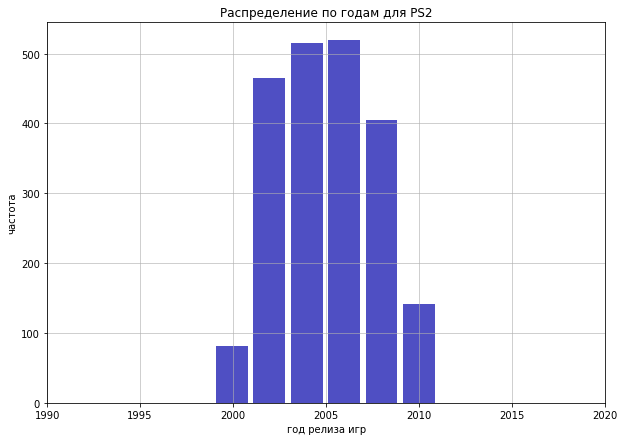

In [17]:
# Создадим функцию, которая рисует распределения
def hist_for_platform(df, platform, title, bins): 
    data_for_hist = df[df['platform'] == platform]
    plt.rcParams["figure.figsize"] = (10, 7)
    plt.hist(x=data_for_hist['year_of_release'], bins= bins, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(alpha=0.75)
    plt.xlabel('год релиза игр')
    plt.ylabel('частота')
    plt.xlim(1990, 2020)
    plt.title(title)
hist_for_platform(data, 'ps2', 'Распределение по годам для PS2', 1000)
# Такое распределение связано с тем, что выход PS2 приходится на 2000-2002 года (2002 - официально в России).
# С течением времени происходит снижение из-за того, что в 2006 году вышла PS3
# Распределение является нормальным
# Сроком "жизни" платформы можно считать период в 10 лет (с 2000 по 2010), дальше - люди переходят на более современную платформу.

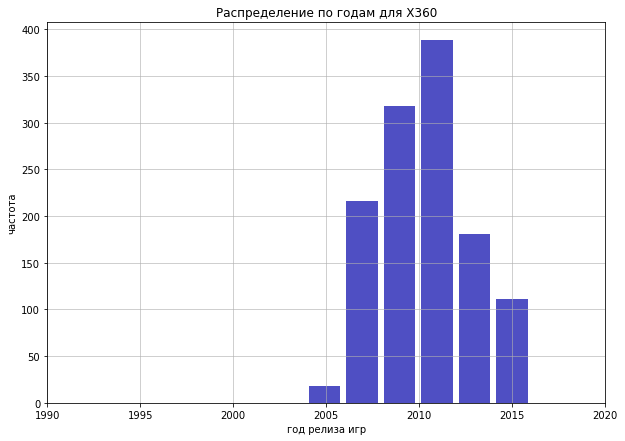

In [18]:
hist_for_platform(data, 'x360', 'Распределение по годам для X360', 1000)
# Распределение похоже на предыдущее: в связи с выходом этой платформы - происходит рост. 
# В дальнейшем - снижение в связи с выходом других приставок, например, PS3. 
# Распределение является нормальным
# Сроком "жизни" можно считать период с 2005 по 2015 год

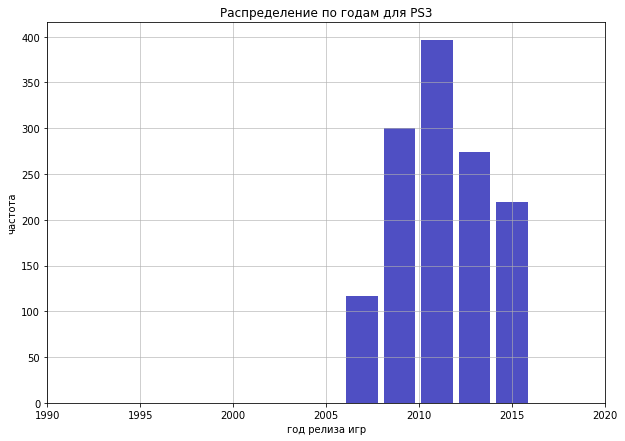

In [19]:
hist_for_platform(data, 'ps3', 'Распределение по годам для PS3', 1000)
# Распределение - нормальное. Вероятно, что рост популярности PS3 привел к падению популярности PS2.
# Время "жизни" считается период с 2006 по 2016 год

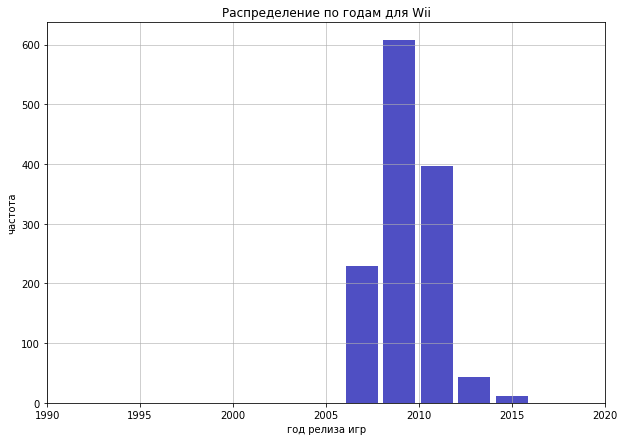

In [20]:
hist_for_platform(data, 'wii', 'Распределение по годам для Wii', 1000)
# Распределение -  нормальное. Время "жизни" платформы можно считать период с 2006 по 2016.

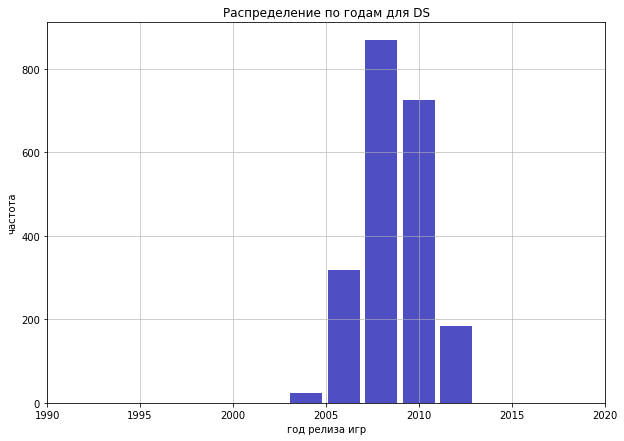

In [21]:
hist_for_platform(data, 'ds', 'Распределение по годам для DS', 1000)
# Распределение является нормальным, время "жизни" - период с 2003 по 2013 год.

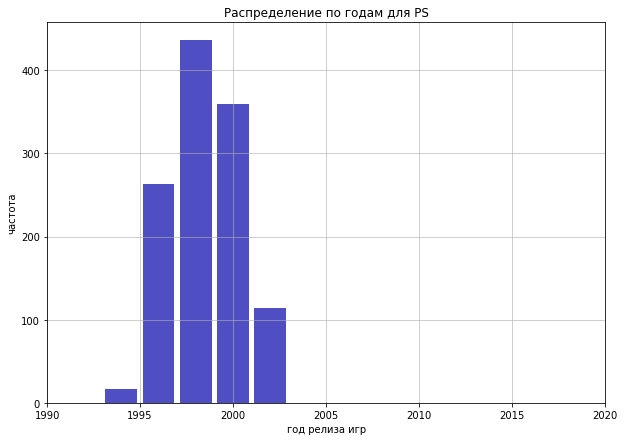

In [22]:
hist_for_platform(data, 'ps', 'Распределение по годам для PS', 1000)
# Распределение - нормальное, снижение популярности может быть связано с выходом PS2. 
# Время "жизни" - с 1994 по 2003 года.

Взятие данных за соответствующий актуальный период. Актуальный период определяется по результатам предыдущих исследований. Основной фактор — эти данные помогут построить прогноз на 2017 год. 

In [23]:
# Актуальным периодом можно считать период с 2010 по 2016 год, так как раннее были платформы седьмого поколения и ниже.
data_actual = data.query('year_of_release >=2010')

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [24]:
data_actual_platform_sales = data_actual.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
data_platform_sales, data_actual_platform_sales
# Произошло резкое падение продаж игр на платформах PS2, DS, Wii, DS и PS.
# В топ вырвались платформы PS3, XBOX360, PS4, 3DS, XOne и PC.
# Потенциально прибыльные платформы могут быть PS4, XOne и 3DS, так как они вышли относительно недавно и будут вытеснять 
# платформы предыдущих поколений на рынке

(platform
 ps2     1255.77
 x360     971.42
 ps3      939.65
 wii      907.51
 ds       806.12
 ps       730.86
 gba      317.85
 ps4      314.14
 psp      294.05
 pc       259.52
 3ds      259.00
 xb       257.74
 gb       255.46
 nes      251.05
 n64      218.68
 snes     200.04
 gc       198.93
 xone     159.32
 2600      96.98
 wiiu      82.19
 psv       54.07
 sat       33.59
 gen       30.77
 dc        15.95
 scd        1.86
 ng         1.44
 ws         1.42
 tg16       0.16
 3do        0.10
 gg         0.04
 pcfx       0.03
 Name: all_sales, dtype: float64, platform
 ps3     587.74
 x360    550.41
 ps4     314.14
 3ds     257.81
 wii     222.97
 xone    159.32
 ds      123.75
 pc      121.96
 wiiu     82.19
 psp      64.05
 psv      53.81
 ps2       6.09
 Name: all_sales, dtype: float64)

Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

Text(0.5, 1.0, '"Ящик с усами" для XOne, PS4 и 3DS')

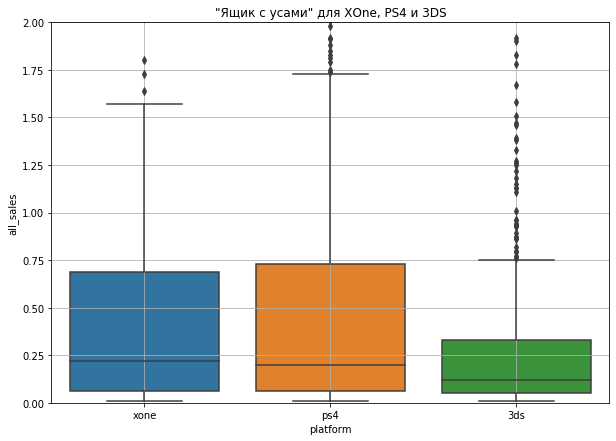

In [25]:
# Построим график "ящик с усами" для XOne, PS4 и 3DS
plt.rcParams["figure.figsize"] = (10, 7)
ax = sns.boxplot(x="platform", y="all_sales", data=data_actual, order = ['xone', 'ps4', '3ds'])
plt.ylim(0, 2)
plt.grid()
plt.title('"Ящик с усами" для XOne, PS4 и 3DS')
# 1 квартиль лежит около нуля для всех платформ, однако для PS4(0.1) и XOne(0.1) он выше,чем для 3DS (0.08), 
# 2 квартиль - в пределах 0.25 для XONe и PS4(у PS4 - ниже, около 0.23), 
# 3DS - в районе 0.13. 3 квартиль больше всех для PS4 (1.75), для XOne - около 1.6, отстает 3DS - 0.75.
# Разница по продажам больше у PS4 и XOne по сравнению с 3DS. Средние продажи у PS4 и XOne также выше, чем у 3DS.

# Из этого можно сделать вывод, что стоит сделать ставку на 3DS, так как медиана сдвинута ближе к центру, чем у конкурентов.
# Таким образом, можно считать, что эта консоль лучше в плане перспективы, так как её "срок жизни" близок к середине.

# Стоит отметить, что довольно данные имеют довольно много аномальных значений.

Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Корреляция между отзывами и продажами: 0.40656790206178095


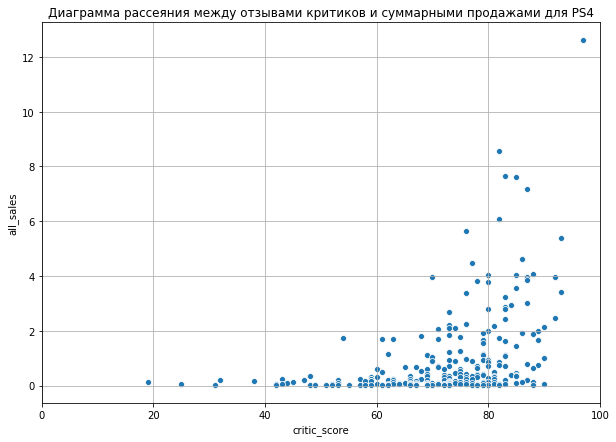

In [26]:
# Почистим от выбросов
data_actual_for_critic = data_actual.query('critic_score >=0')
# Напишим функцию для графиков
def scatterplot(df, platform, score, title, x):
    df = df[df['platform'] == platform]
    plt.rcParams["figure.figsize"] = (10, 7)
    ax = sns.scatterplot(x=score, y="all_sales", data=df)
    plt.xlim(0, x)
    plt.title(title)
    plt.grid()
    print('Корреляция между отзывами и продажами:', df[score].corr(df['all_sales']))
scatterplot(data_actual_for_critic, 'ps4', 'critic_score', 'Диаграмма рассеяния между отзывами критиков и суммарными продажами для PS4', 100)
# Корреляция есть, но слабая. Возможно, дело в том, что зависимость нелинейная. 
# Диаграмма выглядит логичной - чем выше рейтинг критиков, тем в целом больше были продажи. 

Корреляция между отзывами и продажами: -0.027033058622341188


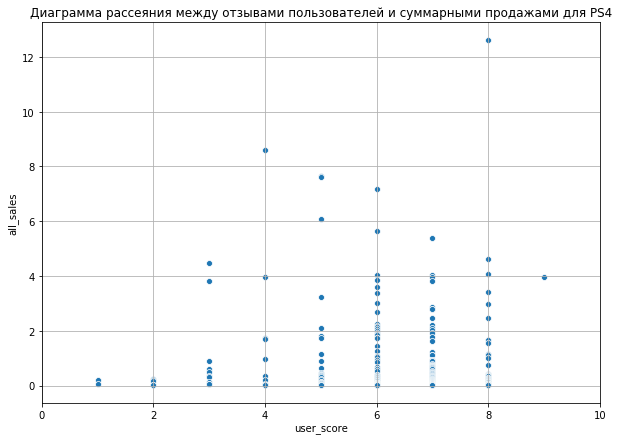

In [27]:
data_actual_for_scatterplot = data_actual.query('user_score >=0')
scatterplot(data_actual_for_scatterplot, 'ps4', 'user_score', 'Диаграмма рассеяния между отзывами пользователей и суммарными продажами для PS4', 10)
# Корреляция слабая, почти нулевая. Однако может быть дело в нелинейной зависимости, 
# либо в том, что оценка пользователя - порядковая переменная и корреляция Пирсона не подходит.
# Для наглядности посмотрим на числовые значения, а не диаграмму.

In [28]:
data_actual_for_scatterplot_ps4 = data_actual_for_scatterplot[data_actual_for_scatterplot['platform'] == 'ps4']
data_actual_for_scatterplot_ps4.groupby('user_score')['all_sales'].mean()
# Однозначно нельзя сказать, есть ли корреляция для всех данных или нет. Есть тенденция повышения продаж с увеличением рейтинга
# от пользователей, однако есть предположение, что здесь будет актуальна фраза "на вкус и цвет фломастеры разные", поэтому
# для кого-то какие-то игры будут не очень, а для кого-то наоборот, однако рейтинг 1-2 и 8-9 поддерживают общую тенденцию
# "больше рейтинг - больше продажи"

user_score
1    0.130000
2    0.128000
3    1.021818
4    1.757000
5    1.391538
6    0.972029
7    0.750964
8    0.913200
9    3.970000
Name: all_sales, dtype: float64

Корреляция между отзывами и продажами: 0.4169983280084017


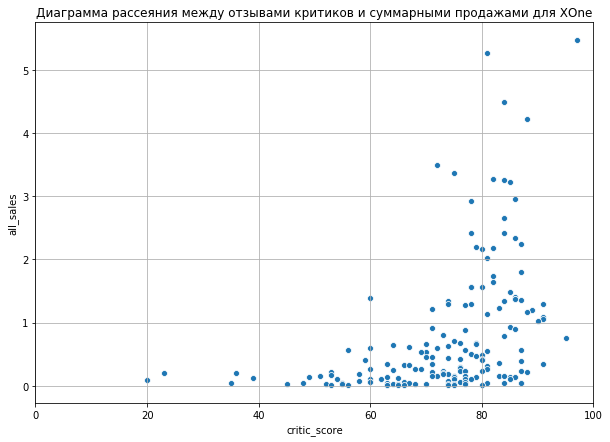

In [29]:
scatterplot(data_actual_for_critic, 'xone', 'critic_score', 'Диаграмма рассеяния между отзывами критиков и суммарными продажами для XOne', 100)
# Тенденция такая же, как и для PS4. 

Корреляция между отзывами и продажами: -0.027033058622341188


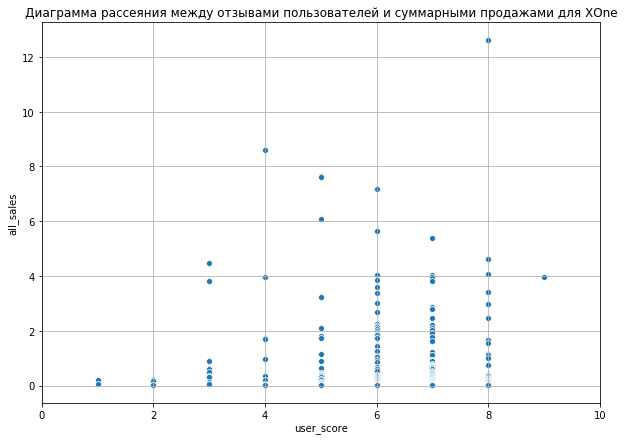

In [30]:
scatterplot(data_actual_for_scatterplot, 'ps4', 'user_score', 'Диаграмма рассеяния между отзывами пользователей и суммарными продажами для XOne', 10)
# Корреляция слабая, почти нулевая. Однако может быть дело в нелинейной зависимости, 
# либо в том, что оценка пользователя - порядковая переменная и корреляция Пирсона не подходит.
# Для наглядности посмотрим на числовые значения, а не диаграмму.

In [31]:
data_actual_for_scatterplot_xone = data_actual_for_scatterplot[data_actual_for_scatterplot['platform'] == 'xone']
data_actual_for_scatterplot_xone.groupby('user_score')['all_sales'].mean()
# Ситуация аналогична, как и для PS4.

user_score
1    0.030000
2    0.120000
3    0.555000
4    0.935000
5    0.926471
6    0.841961
7    0.659800
8    0.416538
9    1.300000
Name: all_sales, dtype: float64

Корреляция между отзывами и продажами: 0.3487397305984834


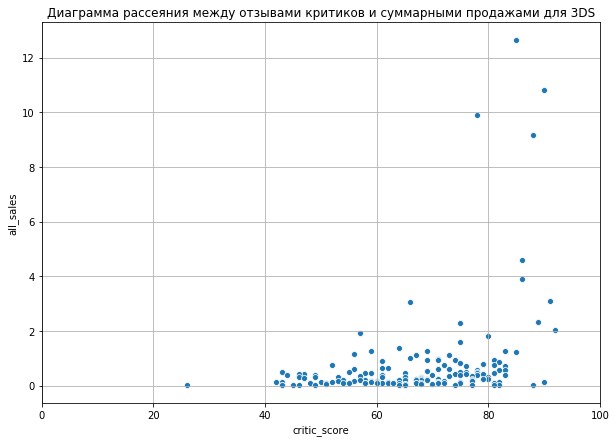

In [32]:
# Построим диаграмму рассеяния для 3DS 
scatterplot(data_actual_for_critic, '3ds', 'critic_score', 'Диаграмма рассеяния между отзывами критиков и суммарными продажами для 3DS', 100)
# Ситуация такая же как и для XOne и PS4

Корреляция между отзывами и продажами: 0.22939440821288484


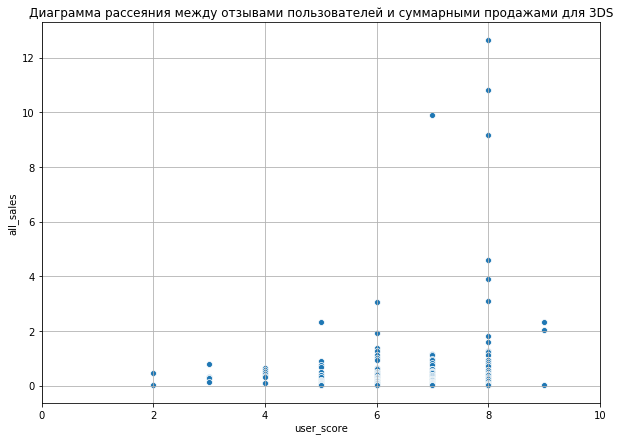

In [33]:
scatterplot(data_actual_for_scatterplot, '3ds', 'user_score', 'Диаграмма рассеяния между отзывами пользователей и суммарными продажами для 3DS', 10)
# Корреляция слабая, почти нулевая. Однако может быть дело в нелинейной зависимости, 
# либо в том, что оценка пользователя - порядковая переменная и корреляция Пирсона не подходит.
# Для наглядности посмотрим на числовые значения, а не диаграмму.

In [34]:
data_actual_for_scatterplot_3ds = data_actual_for_scatterplot[data_actual_for_scatterplot['platform'] == '3ds']
data_actual_for_scatterplot_3ds.groupby('user_score')['all_sales'].mean()
# В целом - тенденция повышения продаж с увеличением пользовательской оценки есть, однако фактор "вкуса и цвета" тут играет важнейшую роль.

user_score
2    0.240000
3    0.351667
4    0.371250
5    0.327500
6    0.482821
7    0.521346
8    1.702432
9    1.460000
Name: all_sales, dtype: float64

Соотнесение выводов с продажами игр на других платформах.

Изучив топ-3 потенциально популярных платформ, можно сделать вывод, что стоит больше ориентироваться на отзывы критиков, так как корреляция между такими отзывами и продажами более явнами, чем между отзывами пользователей и продажами. Вероятно, дело в том, что критики стараются быть независимыми и оценивают продукт по достоинству, чего нельзя сказать об обычных пользователях: они предпочитают игры своего любимого жанра, вселенной и т.д. 

Рассмотрение общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [35]:
# Для этого сгруппируем жанры и прибыль, при этом отсортируем в порядке убывания значения прибыли
data_for_genre_1 = data_actual.groupby('genre', as_index=False)['all_sales'].sum().sort_values(by = 'all_sales', ascending=False)
data_for_genre_1

,genre,all_sales
0,action,673.09
8,shooter,479.74
10,sports,328.39
7,role-playing,315.28
3,misc,234.56
6,racing,122.68
4,platform,119.72
2,fighting,81.59
9,simulation,71.75
1,adventure,61.00


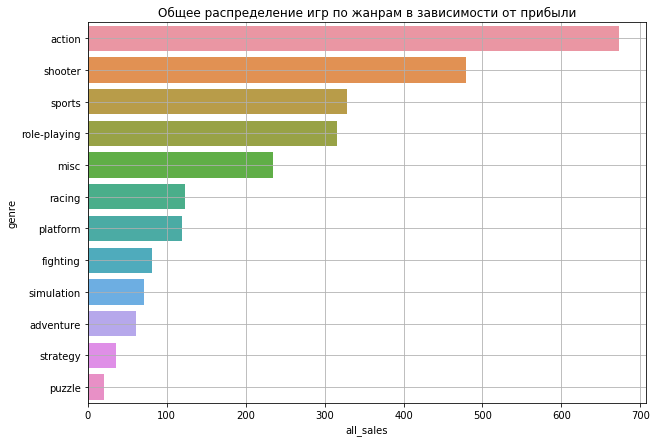

In [36]:
# Посмотрим на гистограмме как располагаются жанры по прибыли
plt.rcParams["figure.figsize"] = (10, 7)
ax = sns.barplot(x='all_sales', y='genre', data=data_for_genre_1)
plt.title('Общее распределение игр по жанрам в зависимости от прибыли')
plt.grid()
# Самыми прибыльными жанрами являются action,  shooter, sports и role-playing, что вполне соответствует реальности
# Низкие продажи имеют puzzle, strategy, adventure, simulation и fighting. 
# Такое расположение жанров по прибыли может быть связано с количественным показателем выхода игр определенного жанра, проверим

In [37]:
data_for_barplot = data_actual.groupby('genre').count().sort_values(by='name', ascending=False)
data_for_barplot = data_for_barplot['name']
data_for_barplot
# Действительно, файтингов и стратегий выходит гораздо меньше, чем экшен-игр или других жанров, входящих в топ-5 по прибыли. 

genre
action          1495
misc             576
sports           575
role-playing     568
adventure        563
shooter          410
racing           237
simulation       217
fighting         199
strategy         170
platform         153
puzzle           114
Name: name, dtype: int64

### Вывод

На данном этапе был проведен исследовательский анализ, в ходе которого были сделаны следующие интересные операции и наблюдения: <ul>
    <li> были выбраны платформы с наибольшими суммарными продажами за весь период времени, указанный в датафрейме (PS, PS2, PS3, xbox360, Wii и DS).
    <li> был выбран актуальный период времени, который можно использовать для прогнозирования продаж в 2017 году (2010-2016 г.) </li>
    <li> из данных за актуальный период были выбраны потенциально прибыльные платформы (PS4, XOne, 3DS) </li>
    <li> был построен график "ящик с усами" для топ-3 потенциально прибыльных платформ, было определено, что разница в продажах есть: продажи выше у XOne и PS4, чем у 3DS. Средние продажи у XOne и PS4 выше, чем у 3DS. Судя по этому графику - стоит сделать ставку на 3DS </li>
    <li> было проанализировано влияние рейтингов критиков и пользователей на продажи: было обнаружено, что рейтинг критиков лучше коррелирует с продажами, чем рейтинг пользователей </li>
    <li> было построено общее распределение игр по жанрам: было обнаружено, что самыми прибыльными жанрами являются action,  shooter, sports и role-playing, а низкие продажи у puzzle, strategy, adventure, simulation и fighting. Вероятно, что дело в количестве изданных игр по каждому из жанров (например, игр в жанре шутер больше, чем в жанре стратегий) </li> 
    

### Шаг 4. Портрет пользователя каждого региона

Определение для пользователя каждого региона (NA, EU, JP):


<li> Самые популярные платформы (топ-5).</li>

In [38]:
# Посмотрим топ-5 в Северной Америке
data_actual_platform_na_sales_top = data_actual.groupby('platform', as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending = False).reset_index()
data_actual_platform_na_sales_top_5 = data_actual_platform_na_sales_top.head()
data_actual_platform_na_sales_top_5

,index,platform,na_sales
0,10,x360,334.18
1,4,ps3,229.25
2,8,wii,121.20
3,5,ps4,108.74
4,11,xone,93.12


In [39]:
# Посмотрим топ-5 в Европе
data_actual_platform_eu_sales_top = data_actual.groupby('platform', as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending = False).reset_index()
data_actual_platform_eu_sales_top_5 = data_actual_platform_eu_sales_top.head()
data_actual_platform_eu_sales_top_5

,index,platform,eu_sales
0,4,ps3,213.60
1,10,x360,163.41
2,5,ps4,141.09
3,2,pc,68.82
4,8,wii,65.91


In [40]:
# Посмотрим топ-5 в Японии
data_actual_platform_jp_sales_top = data_actual.groupby('platform', as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending = False).reset_index()
data_actual_platform_jp_sales_top_5 = data_actual_platform_jp_sales_top.head()
data_actual_platform_jp_sales_top_5

,index,platform,jp_sales
0,0,3ds,100.62
1,4,ps3,59.26
2,6,psp,42.20
3,1,ds,27.90
4,7,psv,21.84


In [41]:
# Объединим в одну таблицу топ5 платформ для каждого региона
platform_sales = data_actual_platform_na_sales_top.join(data_actual_platform_eu_sales_top, lsuffix='_na', rsuffix='_eu')
platform_sales = platform_sales.join(data_actual_platform_jp_sales_top, rsuffix='_jp')
platform_sales.drop(['index_na','index_eu', 'index'], axis=1, inplace=True)
platform_sales.columns=['na_platform', 'na_sales','eu_platform', 'eu_sales', 'jp_platform', 'jp_sales']
platform_sales.head()

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,x360,334.18,ps3,213.60,3ds,100.62
1,ps3,229.25,x360,163.41,ps3,59.26
2,wii,121.20,ps4,141.09,psp,42.20
3,ps4,108.74,pc,68.82,ds,27.90
4,xone,93.12,wii,65.91,psv,21.84


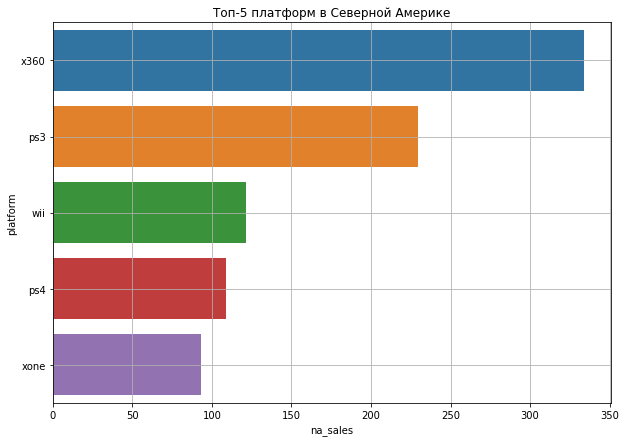

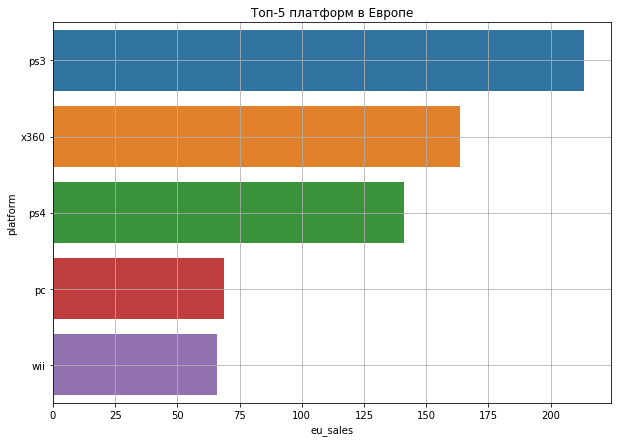

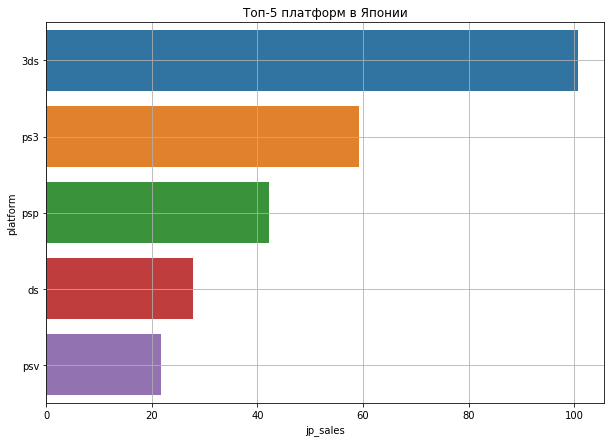

In [42]:
# Напишем функцию, которая будет рисовать barplot 
def barplot_top5(df, x, y, title):
    plt.rcParams["figure.figsize"] = (10, 7)
    ax = sns.barplot(x=x, y=y, data=df)
    plt.title(title)
    plt.grid()
    plt.show()
barplot_top5(data_actual_platform_na_sales_top_5, 'na_sales', 'platform', 'Топ-5 платформ в Северной Америке')  
# В Северной Америке наиболее популярной платформой является XBOX360. 
# Возможно, дело в том, что создатель этой платформы - компания Microsoft - крупнейшая компания из США.
# Затем - следом идет PS3. Wii, PS4 и XOne "закрывают" топ-5 - хоть эти приставки вышли относительно недавно,
# но продажи игр на этих платформах набирают ход. Стоит отметить, что в СА - выше всего прибыль.
# Поэтому в СА стоит сделать ставку на игры, которые выходят на xbox360
barplot_top5(data_actual_platform_eu_sales_top_5, 'eu_sales', 'platform', 'Топ-5 платформ в Европе')  
# В Европе популярнее всего PS3. Так исторически получилось, что японское качество в Европе ценится больше, 
# чем американские продукты. Однако, X360 не так сильно отстает (на 40 млн). Следом идет PS4 - причина та же, 
# что и для PS3. Аномалией является то, что в топ "врывается" PC: не зря считается, что больше всего стримеров
# различных игр на ПК именно в Европе. 
# В Европе стоит сделать ставку на игры, выходящие на платформы от компании sony.
barplot_top5(data_actual_platform_jp_sales_top_5, 'jp_sales', 'platform', 'Топ-5 платформ в Японии')  
# Как ни странно, все топ-5 в Японии - приставки местного происхождения. Да и зачем ехать далеко, 
# если в своей стране делают качественный продукт? (привет, эксклюзивы только на определенные приставки)
# Поэтому стоит сделать ставку на игры, выходящие на пристави, выпущенные в Японии.

<li> Самые популярные жанры (топ-5). </li>

In [43]:
# Посмотрим на ситуацию в Северной Америке
data_actual_na_genre = data_actual.groupby('genre', as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending=False).reset_index()
data_actual_na_genre_top_5 = data_actual_na_genre.head()
data_actual_na_genre_top_5

,index,genre,na_sales
0,0,action,290.64
1,8,shooter,237.47
2,10,sports,156.81
3,3,misc,123.80
4,7,role-playing,112.05


In [44]:
data_actual_eu_genre = data_actual.groupby('genre', as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending=False).reset_index()
data_actual_eu_genre_top_5 = data_actual_eu_genre.head()
data_actual_eu_genre_top_5

,index,genre,eu_sales
0,0,action,233.63
1,8,shooter,171.45
2,10,sports,116.84
3,7,role-playing,75.48
4,3,misc,66.09


In [45]:
data_actual_jp_genre = data_actual.groupby('genre', as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending=False).reset_index()
data_actual_jp_genre_top_5 = data_actual_jp_genre.head()
data_actual_jp_genre_top_5

,index,genre,jp_sales
0,7,role-playing,103.54
1,0,action,72.20
2,3,misc,24.29
3,4,platform,15.81
4,1,adventure,15.67


In [46]:
# Объединим в одну таблицу топ5 жанров для каждого региона
genre_sales = data_actual_na_genre.join(data_actual_eu_genre, lsuffix='_na', rsuffix='_eu')
genre_sales = genre_sales.join(data_actual_jp_genre, rsuffix='_jp')
genre_sales.drop(['index_na','index_eu', 'index'], axis=1, inplace=True)
genre_sales.columns=['na_genre', 'na_sales','eu_genre', 'eu_sales', 'jp_genre', 'jp_sales']
genre_sales.head()

,na_genre,na_sales,eu_genre,eu_sales,jp_genre,jp_sales
0,action,290.64,action,233.63,role-playing,103.54
1,shooter,237.47,shooter,171.45,action,72.20
2,sports,156.81,sports,116.84,misc,24.29
3,misc,123.80,role-playing,75.48,platform,15.81
4,role-playing,112.05,misc,66.09,adventure,15.67


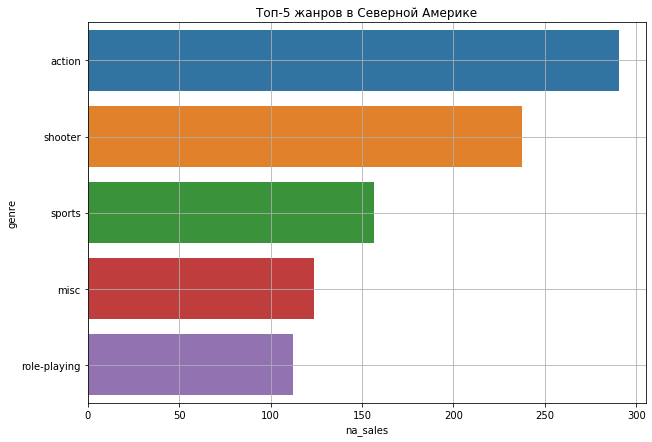

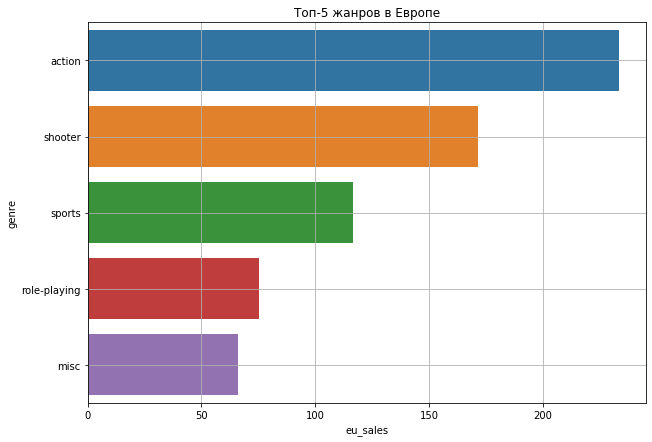

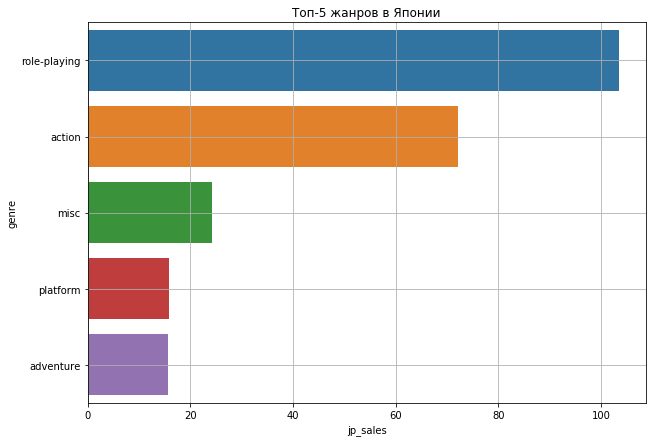

In [47]:
barplot_top5(data_actual_na_genre_top_5, 'na_sales', 'genre', 'Топ-5 жанров в Северной Америке')
# Топ-5 выглядит вполне логичным: большинство игр, которые выпускаются компаниями из Северной Америке, имеют именно такие жанры.
# Опять же - прибыль намного выше, чем для Европы и Японии
barplot_top5(data_actual_eu_genre_top_5, 'eu_sales', 'genre', 'Топ-5 жанров в Европе')
# Соотношение практическое такое же, как и для СА. Основное отличие - 4 место - Role-Playing. Возможно, связано опять же 
# со стримами, где любят транслировать ММОРПГ. 
barplot_top5(data_actual_jp_genre_top_5, 'jp_sales', 'genre', 'Топ-5 жанров в Японии')
# Ситуация кардинально меняется в Японии - РПГ вырывается вперед.
# Появляются такие жанры как Adventure и Platform (любимые жанры в Японии - стоит только посмотреть на статистику выхода игр
# данных жанров в этом регионе)

<li> Влияет ли рейтинг ESRB на продажи в отдельном регионе? </li>

In [48]:
# Посмотрим на ситуацию в Северной Америке
data_actual_na_esrb = data_actual.groupby('rating', as_index=False)['na_sales'].sum().sort_values(by='na_sales', ascending = False).reset_index()

In [49]:
# Посмотрим на ситуацию в Европе
data_actual_eu_esrb = data_actual.groupby('rating', as_index=False)['eu_sales'].sum().sort_values(by='eu_sales', ascending = False).reset_index()
data_actual_eu_esrb

,index,rating,eu_sales
0,3,m,292.04
1,0,e,197.34
2,4,no_rating,139.44
3,6,t,113.08
4,1,e10+,99.28
5,5,rp,0.03
6,2,ec,0.00


In [50]:
# Посмотрим на ситуацию в Европе
data_actual_jp_esrb = data_actual.groupby('rating', as_index=False)['jp_sales'].sum().sort_values(by='jp_sales', ascending = False).reset_index()
data_actual_jp_esrb

,index,rating,jp_sales
0,4,no_rating,171.49
1,0,e,47.87
2,6,t,42.11
3,3,m,30.45
4,1,e10+,13.22
5,2,ec,0.00
6,5,rp,0.00


In [51]:
# Объединим в одну таблицу топ5 рейтингов
rating_sales = data_actual_na_esrb.join(data_actual_eu_esrb, lsuffix='_na', rsuffix='_eu')
rating_sales = rating_sales.join(data_actual_jp_esrb, rsuffix='_jp')
rating_sales.drop(['index_na','index_eu', 'index'], axis=1, inplace=True)
rating_sales.columns=['na_rating', 'na_sales','eu_rating', 'eu_sales', 'jp_rating', 'jp_sales']
rating_sales.head()

,na_rating,na_sales,eu_rating,eu_sales,jp_rating,jp_sales
0,m,382.22,m,292.04,no_rating,171.49
1,e,271.15,e,197.34,e,47.87
2,t,160.81,no_rating,139.44,t,42.11
3,e10+,159.38,t,113.08,m,30.45
4,no_rating,155.72,e10+,99.28,e10+,13.22


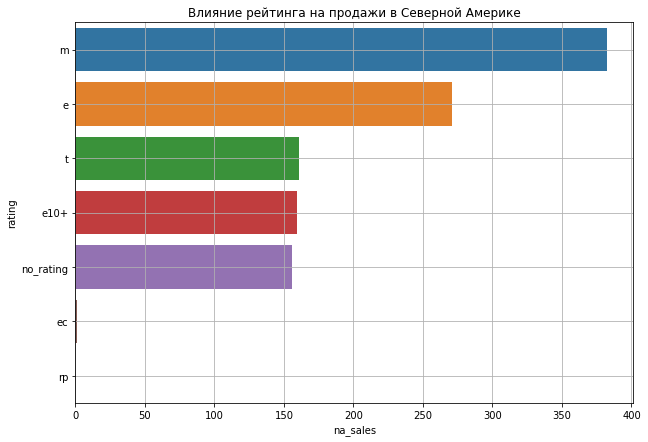

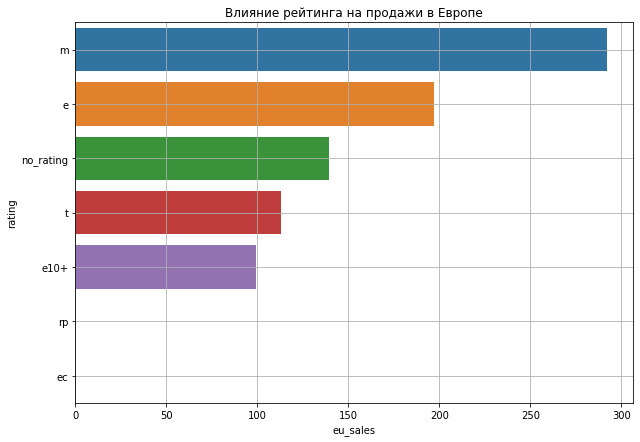

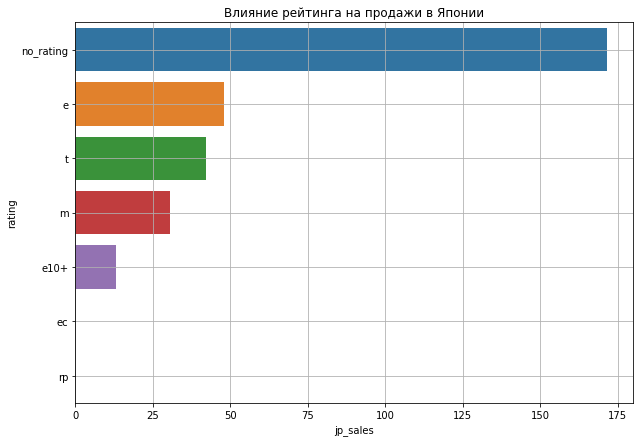

In [52]:
barplot_top5(data_actual_na_esrb, 'na_sales', 'rating', 'Влияние рейтинга на продажи в Северной Америке')
# Суммарно - большинство игр нацелено на аудиторию до 18 лет (категоря E, T, E10+). Однако около 40% на рынке занимают игры
# только для взрослых. 
barplot_top5(data_actual_eu_esrb, 'eu_sales', 'rating', 'Влияние рейтинга на продажи в Европе')
# Ситуация в Европе похожа на ситуацию в Северной Америке
barplot_top5(data_actual_jp_esrb, 'jp_sales', 'rating', 'Влияние рейтинга на продажи в Японии')
# В Японии ситуация кардинально меняется -  больше игр продаются категории "всех возрастов" (категория Е) и "подростков" (T).
# Значительно меньше игры продаются в категории "только для взрослых"
# Как можно заметить - в Японии много игр без рейтинга ESRB.
# В Японии до недавнего времени эта рейтинговая система была крайне несовершенна, из-за чего постоянно случались разные казусы. 
# И хотя законы, касающиеся развлекательной продукции, в Стране восходящего солнца не столь суровы, как в Европе и США, 
# издатели и разработчики все равно терпели убытки.
# Поэтому была введена другая система CERO, основное отличие которой является то, что за рейтингами следит специальная 
# государственная структура. 

### Вывод

На данном этапе было проанализировано поведение пользователей в 3 региона: в Северной Америке, Европе и Японии. 
Было определено: <ul>
    <li> территориальное влияние на выбор платформы сильно сказывается на продажах игр: например, в Японии предпочитают покупать игры только на платформы местного происхождения </li>
    <li> распределение игр по жанрам в зависимости от региона: в Северной Америке и Европе ситуация похожа, в Японии же ситуация кардинально меняется - преимущественно РПГ </li>
    <li> влияние ERSB-рейтинга на продажи: в Европе и Северной Америке около 60% прибыли от игры категории "для всех", "подростков" и "10+", 40% же от "только для взрослых; Япония опять выделяется - большую часть прибыли приносят категории "для всех" и "для подростков", однако есть и много игр без рейтинга ESRB - это связано с тем, что эта система не прижилась в Японии, поэтому на территории этой страны была внедрена своя организация, отвечающая за рейтинг игр.</li>

### Шаг 5. Проверка гипотез

<li> Средние пользовательские рейтинги платформ Xbox One и PC одинаковыe </li>

In [53]:
# Рассмотрим первую гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковыe".
# Так как выясняем, есть ли разница между совокупностями, то нулевая гипотеза будет такой:
# "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковыe".
# Альтернативная гипотеза - исходная.

# Необходимые данные находятся в таблицы data_actual.
# Разделим data_actual по платформам:
data_actual = data_actual[data_actual['user_score'] >=0]
data_actual_xone = data_actual[data_actual['platform'] == 'xone']
data_actual_xone = data_actual_xone.groupby('name')['user_score'].mean()

data_actual_pc = data_actual[data_actual['platform'] == 'pc']
data_actual_pc = data_actual_pc.groupby('name')['user_score'].mean()


print('Дисперсия для пользовательский рейтингов:', np.var(data_actual['user_score']))
print('Стандартное отклонение для пользовательских рейтингов:',np.std(data_actual['user_score']))

Дисперсия для пользовательский рейтингов: 2.367839812996027
Стандартное отклонение для пользовательских рейтингов: 1.538778675767255


In [54]:
# Создадим функцию, которая будет отвергать или не отвергать нулевую гипотезу 
def hypothesis(df_1, df_2, a):
    # Из датафрейма выберем рандомное количество значений, равное N
    # Зададим альфа
    alpha = a
    # Проверим гипотезу о равентсве средних двух независимых совокупностей
    results = st.ttest_ind(
        df_1, 
        df_2)
    print('p-уровень значимости:', alpha)
    print('p-значение:', results.pvalue)

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
        
hypothesis(data_actual_xone, data_actual_pc, 0.05)
# Альфа меньшее, чем 0.05, обычно используются в таких ситуациях, когда необходимо быть ОЧЕНЬ уверенным 
# в отверждении нулевой гипотезы. Поэтому обычно низкие значения альфа используются в точных науках (физика, химия, медицина).
# Для нашего же расчета можно принять альфа 0.05
# Гипотеза H0 c альтернативной H1 не отвергается при уровне значимости 0.05, что звучит вполне логично: 
# есть как разные игры для пк и xbox (эксклюзивы), у которых рейтинги маловероятно, что будут совпадать, так и одинаковые игры
# (кросс-платформенные), в которых тоже может быть разный рейтинг (разная оптимизация для каждой из платформы, 
# наличие или отсутствие багов, разный уровень графики, выпуск DLC для одной из платформ)

p-уровень значимости: 0.05
p-значение: 0.6657847645635646
Не получилось отвергнуть нулевую гипотезу


<li>Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные </li>

In [55]:
# Рассмотрим первую гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные ".
# Так как выясняем, есть ли разница между совокупностями, то нулевая гипотеза будет такой:
# "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые".
# Альтернативная гипотеза - исходная.

# Необходимые данные находятся в таблицы data_actual.
# Разделим data_actual по жанрам:
data_actual_action = data_actual[data_actual['genre'] == 'action']
data_actual_action = data_actual_action.groupby('name')['user_score'].mean()

data_actual_sports = data_actual[data_actual['genre'] == 'sports']
data_actual_sports = data_actual_sports.groupby('name')['user_score'].mean()

hypothesis(data_actual_action, data_actual_sports, 0.05) 
# Гипотеза H0 c альтернативной H1 отвергается при уровне значимости 0.05, что звучит вполне логично: 
# как правило, спортивным играм ставят меньше рейтинги (особенно - пользователи), чем экшенам. Яркий пример - Fifa:
# многие пользователи считают, что из года в год ничего не меняется (в этом есть небольшая доля правды), поэтому и выставляются
# оценки ниже, чем для любой из игр жанра экшн. 

p-уровень значимости: 0.05
p-значение: 6.346762900830976e-09
Отвергаем нулевую гипотезу


### Вывод

На данном этапе была проведена проверка гипотез: <ul>
    <li> нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковыe" не отвергается при уровне значимости 0.05 </li>
    <li> нулевая гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые" отвергается при уровне значимости 0.05</li> 

### Шаг 6. Напишите общий вывод

В данном работе необходимо было выявить закономерности, которые должны определить успешность игр в будущем, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламную компанию. Для этого было сделано следующее: <ul>
    <li> подготовлены данные: обработаны пропуски и изменены типы данных </li> 
    <li> проведен исследовательский анализ данных: </li> <ul>
    <li> были выбраны платформы с наибольшими суммарными продажами за весь период времени, указанный в датафрейме (PS, PS2, PS3, xbox360, Wii и DS).
    <li> был выбран актуальный период времени, который можно использовать для прогнозирования продаж в 2017 году (2010-2016 г.), так как раннее были платформы седьмого поколения и ниже, сейчас же актуальны платформы восьмого поколения </li>
    <li> из данных за актуальный период были выбраны потенциально прибыльные платформы (PS4, XOne, 3DS), которые могут "выстрелить" в 2017 году </li>
    <li> для этих платформ были построены графики "ящик с усами" (было выявлено, что стоит сделать ставку на 3DS в перспективе), графики зависимости прибыли от рейтингов (показано, что корреляция сильнее для оценок критиков и прибыли, чем для оценок пользователей и прибыли - возможно, связано с тем, что пользователи чаще доверяются своим вкусам), общее распределение игр по жанрам(было обнаружено, что самыми прибыльными жанрами являются action,  shooter, sports и role-playing, а низкие продажи у puzzle, strategy, adventure, simulation и fighting. Вероятно, что дело в количестве изданных игр по каждому из жанров (например, игр в жанре шутер больше, чем в жанре стратегий)) </li>
    </ul>
    <li> было проанализировано поведение пользователей в 3 регионах: в Северной Америке, Европе и Японии: </li> <ul>
    <li> территориальное влияние на выбор платформы сильно сказывается на продажах игр </li>
    <li> распределение игр по жанрам в зависимости от региона так же сильно сказывается на продажах игр: Япония отличается в этом плане от СА и Европы </li>
    <li> влияние ESRB-рейтинга на продажи: в Европе и СА около 40% приходится на категорию "только для взрослых", в Японии же - "для всех", также в Японии много игр без рейтинга - связано с тем, что у них свой критерий оценки игр </li>
    </ul> 

    
Таким образом, используя машинное обучение, на основе этой работы можно прогнозировать продажи и сделать ставку на потенциально популярный продукт. 